# Density profiles

This notebook illustrates the use of the multiple density profiles available in ZPIC. Just uncomment the required line below the `# Density profile` line in the next cell to choose the density type to test.

In [1]:
import em1d
import numpy as np

# Custom density profile
def custom_n0(x):
    return 1.0 + 0.5*np.sin(2*x/np.pi)*np.sin(x/np.pi) 

# Time step
dt = 0.019
tmax = 10.0

# Simulation box
nx  = 64
box = 20.0

# Diagnostic frequency
ndump = 100

# Density Profile
#density = em1d.Density( type = "uniform" )
#density = em1d.Density( type = "step", start = 17.5 )
#density = em1d.Density( type = "slab", start = 17.5, end = 22.5 )
#density = em1d.Density( type = "ramp", start = 17.5, end = 22.5, ramp = [1.0,2.0] )
density = em1d.Density( type = "custom", custom = custom_n0 )

# Background plasma
electrons = em1d.Species( "electrons", -1.0, 128, density = density )

# Initialize simulation data
sim = em1d.Simulation( nx, box, dt, species = electrons )

# Set moving window
sim.set_moving_window()

# Run the simulation
sim.run( tmax )


Running simulation up to t = 10 ...
n = 527, t = 10.013
Done.


### Charge Density

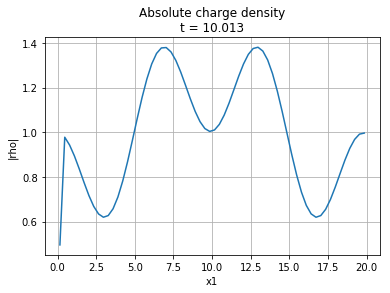

In [2]:
import matplotlib.pyplot as plt

charge = np.abs(electrons.charge())

xmin = sim.dx/2
xmax = sim.box - sim.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), charge ) 
plt.xlabel("x1")
plt.ylabel("|rho|")
plt.title("Absolute charge density\nt = {:g}".format(sim.t))

plt.grid(True)
plt.show()